In [1]:
import yfinance as yf
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
if os.path.exists("db.csv"):
    df = pd.read_csv("db.csv", index_col=0)
else:
    dt = yf.Ticker("BA")
    df = dt.history(period="max")
    df.to_csv("db.csv")
df.index = pd.to_datetime(df.index, utc=True)


In [3]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02 05:00:00+00:00,0.058398,0.060358,0.058398,0.058398,841958,0.0,0.0
1962-01-03 05:00:00+00:00,0.058398,0.059378,0.058398,0.059182,801865,0.0,0.0
1962-01-04 05:00:00+00:00,0.059182,0.059378,0.058791,0.059182,962238,0.0,0.0
1962-01-05 05:00:00+00:00,0.059182,0.059574,0.058987,0.059378,962238,0.0,0.0
1962-01-08 05:00:00+00:00,0.059378,0.060162,0.058007,0.059182,1282984,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-16 05:00:00+00:00,93.889999,94.610001,93.629997,94.510002,12923900,0.0,0.0
2023-11-17 05:00:00+00:00,94.750000,95.379997,93.919998,94.150002,12189300,0.0,0.0
2023-11-20 05:00:00+00:00,93.980003,95.589996,93.870003,95.029999,14105300,0.0,0.0


In [4]:
del df['Dividends']
del df['Stock Splits']

<Axes: xlabel='Date'>

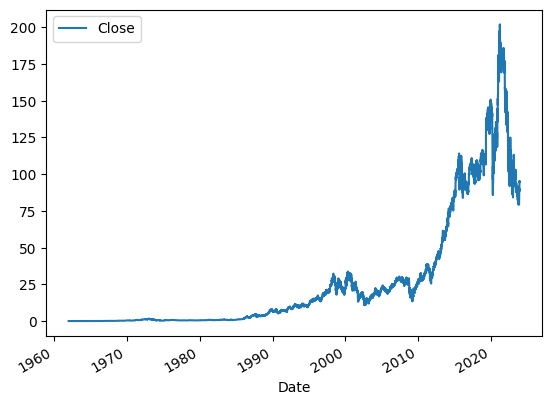

In [20]:
df.plot.line(y="Close")

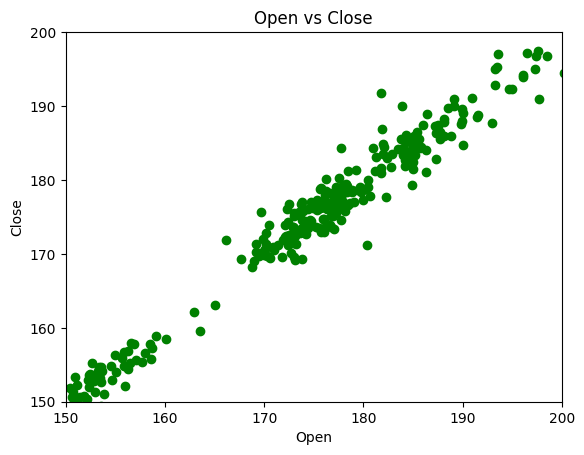

In [6]:
plt.scatter(df['Open'], df['Close'], color="green")
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Open vs Close')

plt.xlim(150,200)
plt.ylim(150, 200)

plt.show()

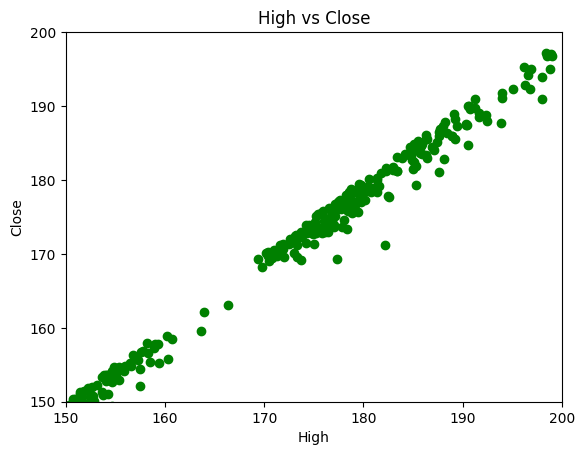

In [7]:
plt.scatter(df['High'], df['Close'], color="green")

plt.xlabel('High')
plt.ylabel('Close')
plt.title('High vs Close')

plt.xlim(150,200)
plt.ylim(150, 200)

plt.show()

In [8]:
X = df[['Open', 'High', 'Low', 'Volume']]
X

,Open,High,Low,Volume
Date,,,,
1962-01-02 05:00:00+00:00,0.058398,0.060358,0.058398,841958
1962-01-03 05:00:00+00:00,0.058398,0.059378,0.058398,801865
1962-01-04 05:00:00+00:00,0.059182,0.059378,0.058791,962238
1962-01-05 05:00:00+00:00,0.059182,0.059574,0.058987,962238
1962-01-08 05:00:00+00:00,0.059378,0.060162,0.058007,1282984
...,...,...,...,...
2023-11-16 05:00:00+00:00,93.889999,94.610001,93.629997,12923900
2023-11-17 05:00:00+00:00,94.750000,95.379997,93.919998,12189300
2023-11-20 05:00:00+00:00,93.980003,95.589996,93.870003,14105300


In [9]:
y = df['Close']
y

Date
1962-01-02 05:00:00+00:00     0.058398
1962-01-03 05:00:00+00:00     0.059182
1962-01-04 05:00:00+00:00     0.059182
1962-01-05 05:00:00+00:00     0.059378
1962-01-08 05:00:00+00:00     0.059182
                               ...    
2023-11-16 05:00:00+00:00    94.510002
2023-11-17 05:00:00+00:00    94.150002
2023-11-20 05:00:00+00:00    95.029999
2023-11-21 05:00:00+00:00    94.449997
2023-11-22 05:00:00+00:00    95.160004
Name: Close, Length: 15581, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

le = LinearRegression()
le.fit(X_train,y_train)
le.score(X_test,y_test)

0.9999502538259051

In [13]:
y

Date
1962-01-02 05:00:00+00:00     0.058398
1962-01-03 05:00:00+00:00     0.059182
1962-01-04 05:00:00+00:00     0.059182
1962-01-05 05:00:00+00:00     0.059378
1962-01-08 05:00:00+00:00     0.059182
                               ...    
2023-11-16 05:00:00+00:00    94.510002
2023-11-17 05:00:00+00:00    94.150002
2023-11-20 05:00:00+00:00    95.029999
2023-11-21 05:00:00+00:00    94.449997
2023-11-22 05:00:00+00:00    95.160004
Name: Close, Length: 15581, dtype: float64

In [14]:
X_test

,Open,High,Low,Volume
Date,,,,
2008-03-31 04:00:00+00:00,26.333801,26.707088,26.291381,11352000
1994-07-29 04:00:00+00:00,10.449305,10.635346,10.449305,2750634
1977-03-15 05:00:00+00:00,0.533431,0.543689,0.531721,4403447
1996-12-23 05:00:00+00:00,18.231222,18.231222,18.042299,2471769
2015-10-20 04:00:00+00:00,102.695893,103.614575,102.564653,9674400
...,...,...,...,...
2014-03-07 05:00:00+00:00,76.938442,76.984460,75.484340,7478100
1986-06-19 04:00:00+00:00,2.959750,3.004146,2.952350,3669944
2004-03-15 05:00:00+00:00,20.440214,20.512640,20.198794,11247339


In [15]:
y_pred = le.predict(X)

In [16]:
df['pred'] = pd.DataFrame(data={'pred': y_pred}, index=df.index)
df

,Open,High,Low,Close,Volume,pred
Date,,,,,,
1962-01-02 05:00:00+00:00,0.058398,0.060358,0.058398,0.058398,841958,0.058594
1962-01-03 05:00:00+00:00,0.058398,0.059378,0.058398,0.059182,801865,0.057759
1962-01-04 05:00:00+00:00,0.059182,0.059378,0.058791,0.059182,962238,0.057653
1962-01-05 05:00:00+00:00,0.059182,0.059574,0.058987,0.059378,962238,0.057956
1962-01-08 05:00:00+00:00,0.059378,0.060162,0.058007,0.059182,1282984,0.057741
...,...,...,...,...,...,...
2023-11-16 05:00:00+00:00,93.889999,94.610001,93.629997,94.510002,12923900,94.229691
2023-11-17 05:00:00+00:00,94.750000,95.379997,93.919998,94.150002,12189300,94.608589
2023-11-20 05:00:00+00:00,93.980003,95.589996,93.870003,95.029999,14105300,95.174272


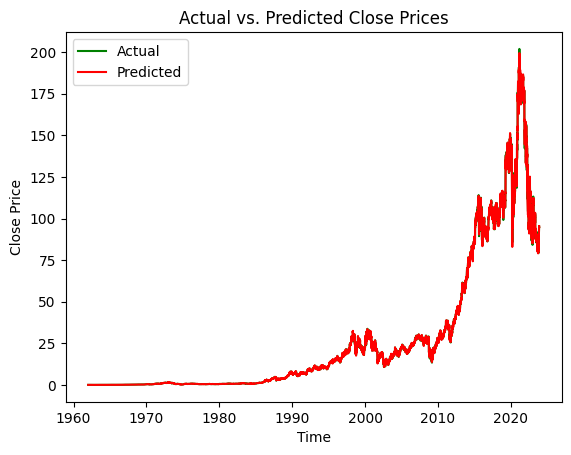

In [23]:
plt.plot(df.index, df['Close'], color="green", label="Actual")
plt.plot(df.index, df['pred'], color="red", label="Predicted")

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()

plt.show()

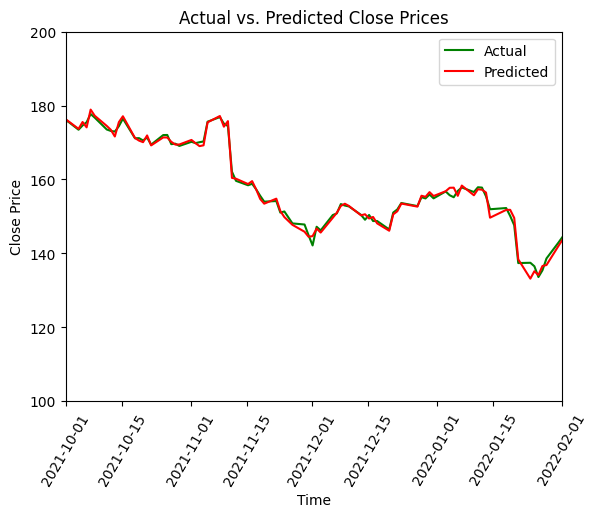

In [22]:
plt.plot(df.index, df['Close'], color="green", label="Actual")
plt.plot(df.index, df['pred'], color="red", label="Predicted")

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.legend()
plt.xticks(rotation=60)

start_date = datetime.strptime('2021-10-01', '%Y-%m-%d')
end_date = datetime.strptime('2022-02-01', '%Y-%m-%d')

plt.xlim(start_date, end_date)
plt.ylim(100, 200)

plt.show()


In [21]:
le.predict([[90.03,91.54,89.99,12914795]])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([91.19306087, 91.19306087])